In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

import numpy as np

# Balanced Function

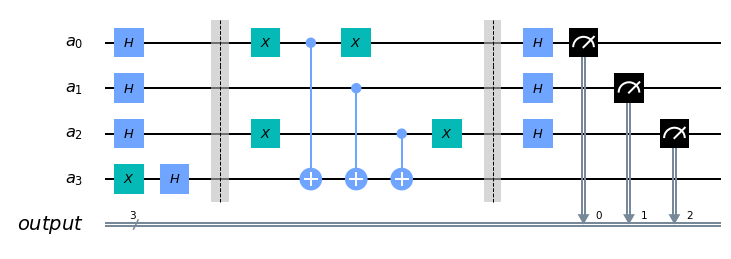

In [57]:
# Create registers and circuit
n = 4
a = QuantumRegister(n, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[3])
qc.h(a)
qc.barrier()

#oracle
qc.x(a[0])
qc.x(a[2])
qc.cx(a[0], a[3]) 
qc.cx(a[1], a[3]) 
qc.cx(a[2], a[3]) 
qc.x(a[0])
qc.x(a[2])
qc.barrier()

for i in range(n-1):
    qc.h(a[i])
    
# Measure the output
m = ClassicalRegister(3, 'output')
qc.add_register(m)
for i in range(n-1):
    qc.measure(a[i],i)
    
qc.draw(output='mpl')

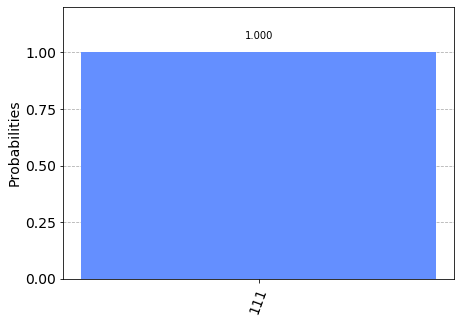

In [58]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Constant function (f(x) = 1)

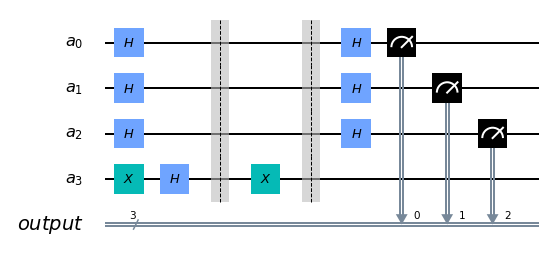

In [62]:
# Create registers and circuit
n = 4
a = QuantumRegister(n, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[3])
qc.h(a)
qc.barrier()

#oracle
qc.x(3)
qc.barrier()

for i in range(n-1):
    qc.h(a[i])
    
# Measure the output
m = ClassicalRegister(3, 'output')
qc.add_register(m)
for i in range(n-1):
    qc.measure(a[i],i)
    
qc.draw(output='mpl')

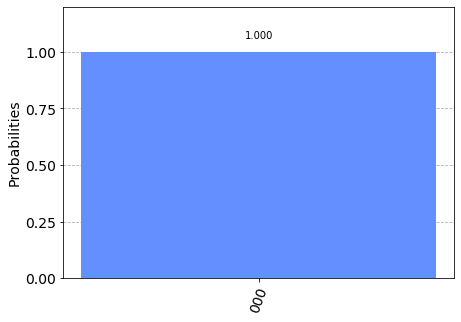

In [63]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)